<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [198]:
#@title Current Date
Today = '2021-10-05' #@param {type:"date"}


In [199]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "1" #@param {type:"string"}
Student_ID_Name = "20172257 Stephen Quirke" #@param {type:"string"}
Student_ID_Name = "Nigel Portley" #@param {type:"string"}
Student_ID_Name = "Carlos Siqueira Do Amaral" #@param {type:"string"}
Student_ID_Name = "Tom Keane" #@param {type:"string"}
Student_ID_Name = "Daire Campbell" #@param {type:"string"}
#@markdown ---

In [200]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = "Draft" #@param ["Draft", "Final"]
Submission = False #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [201]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [202]:
# standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

plt.style.use('ggplot')

In [203]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [204]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [205]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [206]:
!pip install gpy

In [207]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [208]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

## Training & Test Data

In [209]:
# split data into training and test
from sklearn.model_selection import train_test_split

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
#X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [210]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [211]:
# Import Test and Training Data
dftrain = pd.read_csv(os.path.join("/content/drive/MyDrive/Colab Notebooks/ET5003_Kaggle_Comp/","HousePrice_Train.csv"))
dftest = pd.read_csv(os.path.join("/content/drive/MyDrive/Colab Notebooks/ET5003_Kaggle_Comp/","HousePrice_Test.csv"))

In [212]:
# Show rows and columns count
print("Training Data:", dftrain.shape)
print("Test Data:", dftest.shape)

Training Data: (1638, 14)
Test Data: (702, 13)


### Train dataset

In [213]:
# show first data frame rows 
dftrain.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


In [214]:
# Generate descriptive statistics
dftrain.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1638.000000,1.638000e+03,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1.638000e+03
mean,819.500000,1.231930e+07,2.054335,3.043346,53.350473,-6.255086,169.540695,5.547196e+05
std,472.994186,1.447540e+05,1.241259,1.379650,0.076832,0.144430,1791.793934,5.652032e+05
min,1.000000,1.118567e+07,1.000000,1.000000,52.501856,-6.497000,3.400000,1.999500e+04
25%,410.250000,1.228104e+07,1.000000,2.000000,53.294261,-6.309613,73.000000,2.950000e+05
50%,819.500000,1.238055e+07,2.000000,3.000000,53.341386,-6.247780,97.050000,3.950000e+05
75%,1228.750000,1.240548e+07,3.000000,4.000000,53.382031,-6.193982,135.000000,5.950000e+05
max,1638.000000,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,72236.387140,8.900000e+06


In [215]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          1638 non-null   int64  
 1   ID             1638 non-null   int64  
 2   Location       1638 non-null   object 
 3   Num_Bathrooms  1638 non-null   int64  
 4   Num_Beds       1638 non-null   int64  
 5   BER_class      1387 non-null   object 
 6   Description    1638 non-null   object 
 7   Services       577 non-null    object 
 8   Features       1638 non-null   object 
 9   Latitude       1638 non-null   float64
 10  Longitude      1638 non-null   float64
 11  Type           1638 non-null   object 
 12  Surface        1638 non-null   float64
 13  Price          1638 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 179.3+ KB


In [216]:
dftrain["BER_class"].value_counts()

D1                     182
D2                     173
C3                     154
C2                     144
C1                     133
E1                     110
G                      103
E2                     101
F                       89
B3                      78
B2                      48
A3                      37
SINo666of2006exempt     15
A2                      12
B1                       7
A1                       1
Name: BER_class, dtype: int64

In [217]:
dftrain["Type"].value_counts()

semi-detached     458
apartment         431
terraced          299
detached          234
end-of-terrace    118
bungalow           48
duplex             33
townhouse          14
studio              2
site                1
Name: Type, dtype: int64

### Test dataset

In [218]:
# show first data frame rows 
dftest.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
0,1639,12292473,Milltown,2,2,C2,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,townhouse,65.0
1,1640,12314667,Glasnevin,2,5,E1,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,semi-detached,142.0
2,1641,11699240,Dalkey,1,2,G,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,detached,80.0
3,1642,12416984,Raheny,4,4,A2,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,detached,209.0
4,1643,12383407,Crumlin,2,3,F,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,end-of-terrace,108.0


In [219]:
dftest["BER_class"].value_counts()

D1                     72
C3                     70
D2                     68
C2                     65
C1                     49
E2                     47
F                      46
E1                     44
G                      41
B3                     28
B2                     21
A3                     20
SINo666of2006exempt     8
A2                      8
B1                      7
Name: BER_class, dtype: int64

In [220]:
dftest["Type"].value_counts()

apartment         194
semi-detached     172
terraced          132
detached          100
end-of-terrace     64
bungalow           18
duplex             15
townhouse           5
site                2
Name: Type, dtype: int64

In [221]:
# Generate descriptive statistics
dftest.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface
count,702.000000,7.020000e+02,702.000000,702.000000,702.000000,702.000000,702.000000
mean,1989.500000,1.231545e+07,2.027066,2.987179,53.350445,-6.252411,132.603530
std,202.794231,1.420680e+05,1.071273,1.198480,0.073961,0.091600,330.347066
min,1639.000000,1.147889e+07,1.000000,1.000000,53.214227,-6.521183,32.100000
25%,1814.250000,1.227637e+07,1.000000,2.000000,53.295225,-6.304258,73.000000
50%,1989.500000,1.237928e+07,2.000000,3.000000,53.341153,-6.247799,99.200000
75%,2164.750000,1.240421e+07,3.000000,4.000000,53.381752,-6.184277,136.875000
max,2340.000000,1.242824e+07,9.000000,14.000000,53.617443,-6.057150,8576.000000


In [222]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          702 non-null    int64  
 1   ID             702 non-null    int64  
 2   Location       702 non-null    object 
 3   Num_Bathrooms  702 non-null    int64  
 4   Num_Beds       702 non-null    int64  
 5   BER_class      594 non-null    object 
 6   Description    702 non-null    object 
 7   Services       246 non-null    object 
 8   Features       702 non-null    object 
 9   Latitude       702 non-null    float64
 10  Longitude      702 non-null    float64
 11  Type           702 non-null    object 
 12  Surface        702 non-null    float64
dtypes: float64(3), int64(4), object(6)
memory usage: 71.4+ KB


#Data Pre-Processing

## Handle Missing Data

In [223]:
# Make copies of the data
dftrain_raw = dftrain
dftest_raw = dftest

In [224]:
# Check missing values
dftrain.isna().sum()

Index               0
ID                  0
Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features            0
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64

In [225]:
# Get list of column names
column_list = dftrain.columns.values.tolist()
print(column_list)

['Index', 'ID', 'Location', 'Num_Bathrooms', 'Num_Beds', 'BER_class', 'Description', 'Services', 'Features', 'Latitude', 'Longitude', 'Type', 'Surface', 'Price']


In [226]:
# Percentage of missing data
for col in column_list:
  print(f"Missing {col} data:", str(round(((dftrain[col].isna().sum()/2931)*100),2))+ '%')

Missing Index data: 0.0%
Missing ID data: 0.0%
Missing Location data: 0.0%
Missing Num_Bathrooms data: 0.0%
Missing Num_Beds data: 0.0%
Missing BER_class data: 8.56%
Missing Description data: 0.0%
Missing Services data: 36.2%
Missing Features data: 0.0%
Missing Latitude data: 0.0%
Missing Longitude data: 0.0%
Missing Type data: 0.0%
Missing Surface data: 0.0%
Missing Price data: 0.0%


There is 8.56% of BER and 36.2% of services missing data, There is also mising data for features but this is not reflecting at the data has a string value. Lets investigate further

In [227]:
dftrain = dftrain.where(dftrain != "None", None)

In [228]:
# Check missing values
dftrain.isna().sum()

Index               0
ID                  0
Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features          516
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64

In [229]:
# Percentage of missing data
for col in column_list:
  print(f"Missing {col} data:", str(round(((dftrain[col].isna().sum()/2931)*100),2))+ '%')

Missing Index data: 0.0%
Missing ID data: 0.0%
Missing Location data: 0.0%
Missing Num_Bathrooms data: 0.0%
Missing Num_Beds data: 0.0%
Missing BER_class data: 8.56%
Missing Description data: 0.0%
Missing Services data: 36.2%
Missing Features data: 17.6%
Missing Latitude data: 0.0%
Missing Longitude data: 0.0%
Missing Type data: 0.0%
Missing Surface data: 0.0%
Missing Price data: 0.0%


There is also 17.6% of missing dat for features. We will not treat these mssing values for now as we will be traing them differently for each algorithm.

## Handle Outliers

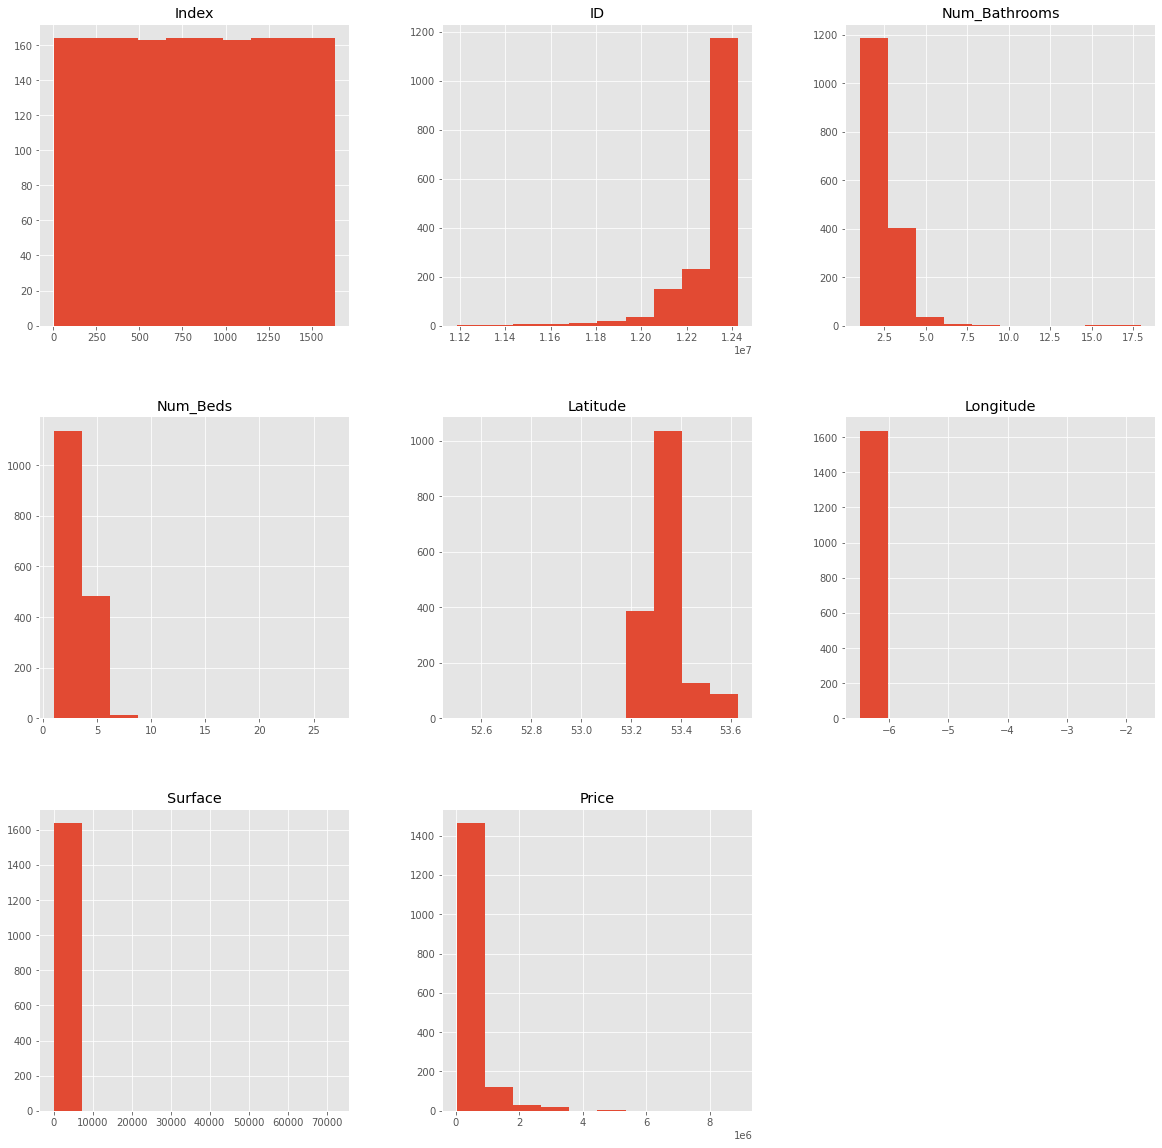

In [230]:
 dftrain.hist(figsize=[20,20]);

We will create a function to output a boxplot of the the numeric features

In [231]:
def boxplot_features(features):
    """
    box plot selected features
    
    :param features: list of features to be plotted
    :param plt: boxplot for each features
    """
    for f in features:
        plt.figure(figsize=(8,6), dpi= 100, facecolor='lightblue', edgecolor='k')
        sns.boxplot(x=dftrain[f], orient='v', width=0.2)
        plt.show()
        print(" ")
    return plt

In [232]:
# Get the data type for each column
dftrain.dtypes

Index              int64
ID                 int64
Location          object
Num_Bathrooms      int64
Num_Beds           int64
BER_class         object
Description       object
Services          object
Features          object
Latitude         float64
Longitude        float64
Type              object
Surface          float64
Price              int64
dtype: object

In [233]:
#Get list of numeric columns
numeric_columns = dftrain.select_dtypes(["int", "float"]).columns.tolist()
print(numeric_columns)

['Index', 'ID', 'Num_Bathrooms', 'Num_Beds', 'Latitude', 'Longitude', 'Surface', 'Price']


We will remove Latitude and Longitude as it is best to visualize them together.

In [234]:
numeric_columns.remove("Index")
numeric_columns.remove("ID")
numeric_columns.remove("Latitude")
numeric_columns.remove("Longitude")
print(numeric_columns)

['Num_Bathrooms', 'Num_Beds', 'Surface', 'Price']


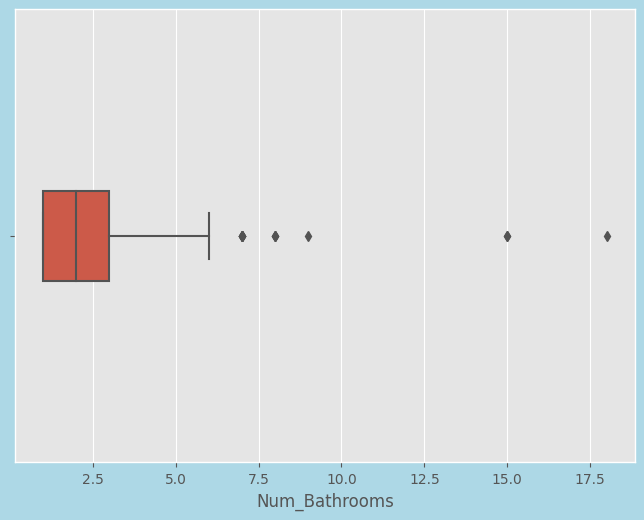

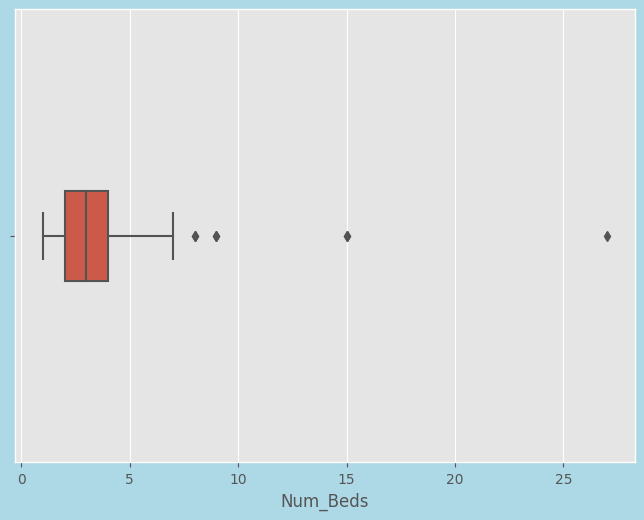

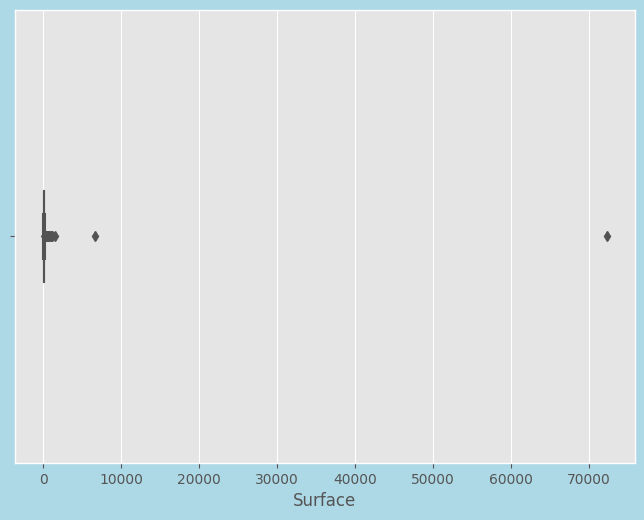

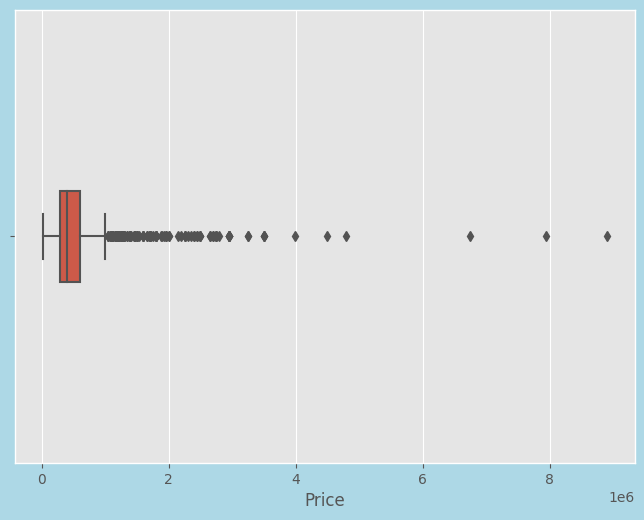

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [235]:
#Show boxplots of numeric values
boxplot_features(numeric_columns)

We see that we get a number of outliers for the numeric colums plotted. However this does not gives us much insight as there could be expensive and large house included in the dataset. We also see that we get a house that is larger than 70'000 m2 which cannot be possible so this should be removed. We will deep dive into these edge cases later but first lets prpoduce some scatter plots with lon/lat plus the other numeric values plotted vs prices which will provide better insight into the outliers present.

In [236]:
def scatterplot_features(features):
    """
    box plot selected features
    
    :param features: list of features to be plotted
    :param plt: boxplot for each features
    """
    for f in features:
        plt.figure(figsize=(8,6), dpi= 100, facecolor='lightblue', edgecolor='k')
        sns.scatterplot(data=dftrain, x=f[0], y=f[1], s=100, hue=f[2], marker="+")
        plt.show()
        print(" ")
    return plt

In [237]:
feature_combo = [["Latitude", "Longitude", "Price"], 
                 ["Surface", "Price", "Price"], 
                 ["Num_Bathrooms", "Price", "Price"], 
                 ["Num_Beds", "Price", "Price"], 
                 ["Num_Bathrooms", "Num_Beds", "Price"]]

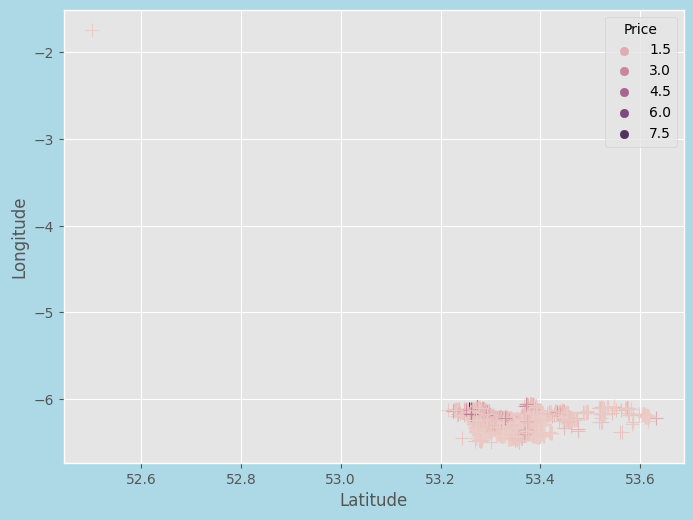

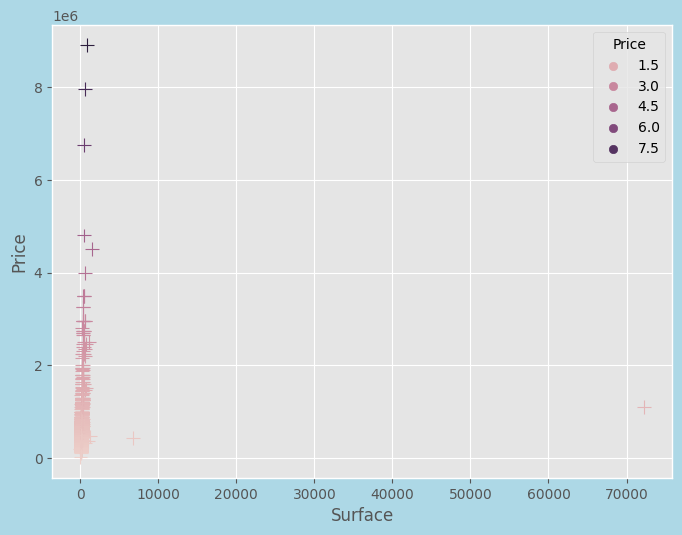

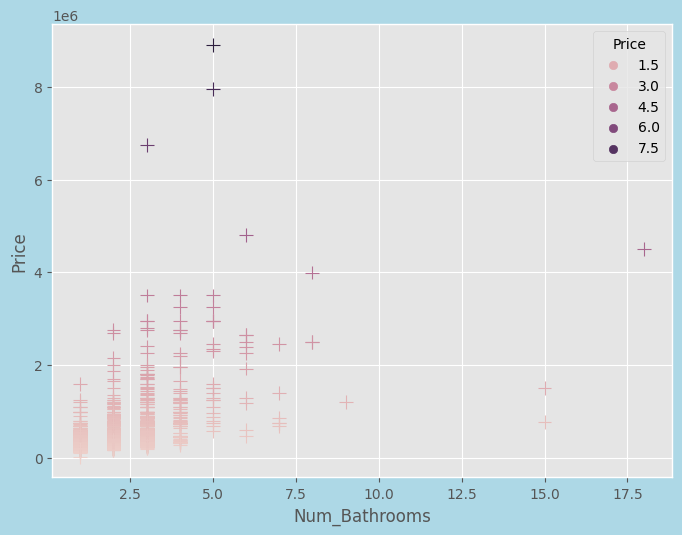

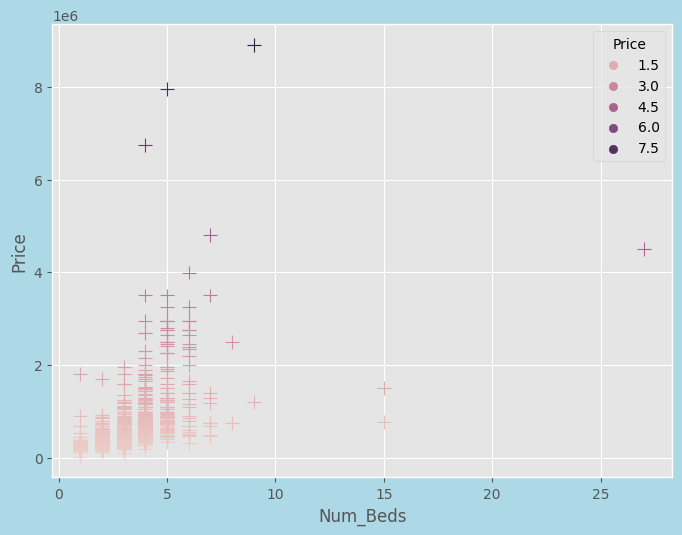

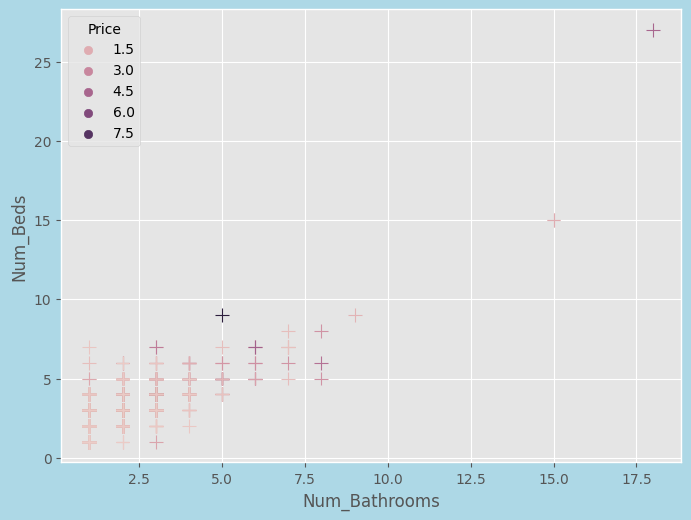

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [238]:
scatterplot_features(feature_combo)

We will apply a filter to isolate the outliers based on the plots

In [239]:
#Apply a filter to isolate outliers

#Longitude
longitude_filter = dftrain["Longitude"] > -5
#Surface
surface_filter = dftrain["Surface"] > 70000
#Bathrooms
bathroom_filter = dftrain["Num_Bathrooms"] > 10

outliers = dftrain[bathroom_filter 
                   | longitude_filter 
                   | surface_filter]
outliers.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
355,356,12270559,Clondalkin,1,3,NaN,RAY COOKE AUCTIONEERS take great pleasure in i...,NaN,None,52.501856,-1.744995,semi-detached,79.00000,199000
506,507,11675753,Swords,1,4,E1,Thornton Park is a superb modern equestrian ce...,NaN,None,53.474502,-6.343483,bungalow,72236.38714,1100000
557,558,12381836,Inchicore,15,15,D1,umber 67 &amp; 69 Jamestown Road represent a f...,Parking,18 separate units\nTransport links including t...,53.335109,-6.331515,semi-detached,318.20000,775000
1099,1100,11780612,Dun Laoghaire,15,15,NaN,A truly unique stone built house of great qual...,"Parking,Gas Fired Central Heating,Alarm,Wired ...",Lift servicing all floors\nVenetian and gothic...,53.287504,-6.146605,detached,700.00000,1500000
1378,1379,12085770,Killiney,18,27,NaN,The Grove is an imposing Victorian mansion bui...,NaN,Approx. 1 490 sq. m / 16 041 sq. ft. of accomm...,53.260955,-6.117266,detached,1490.00000,4500000


After investigating the outliers we whould remove these rows for the following reasons:

*   **355**: Coodinates show that the house is in the UK, not Clondalkin
*   **506**: This is an Equatrian centre
*   **557**: Not clear what this is, apparently there is 18 units what ever this is meaning its some sort of dormitory, maybe sort of student accomodation

We can alter the followingfeature instead of deleting it:

*   **1115**: Surface is worng by a factor of 100, must have been a typo. We can impute the correct value by dividing the value by 100



In [240]:
dftrain.loc[1115, "Surface"] = (dftrain.loc[1115, "Surface"] / 100)

In [241]:
drop_rows = [355, 506, 557]
dftrain.drop(index=drop_rows, inplace=True)

In [242]:
dftrain.shape

(1635, 14)

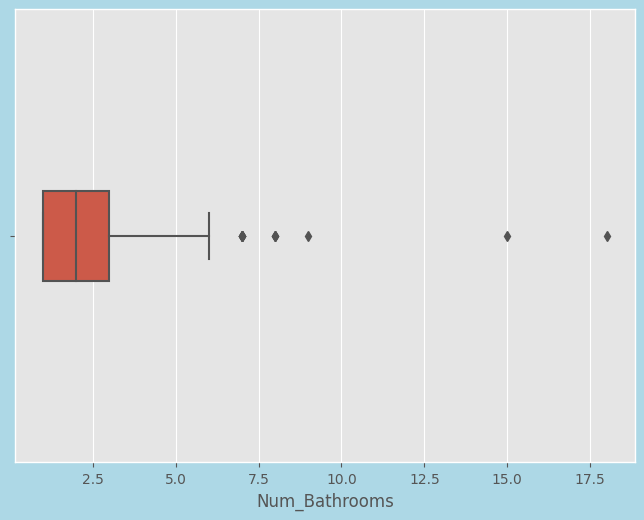

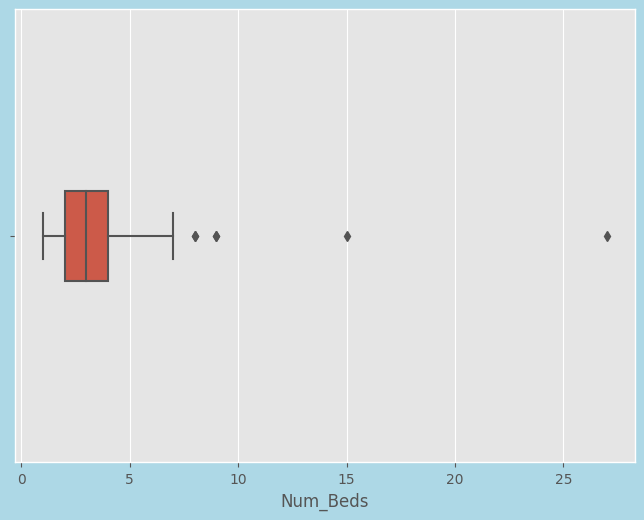

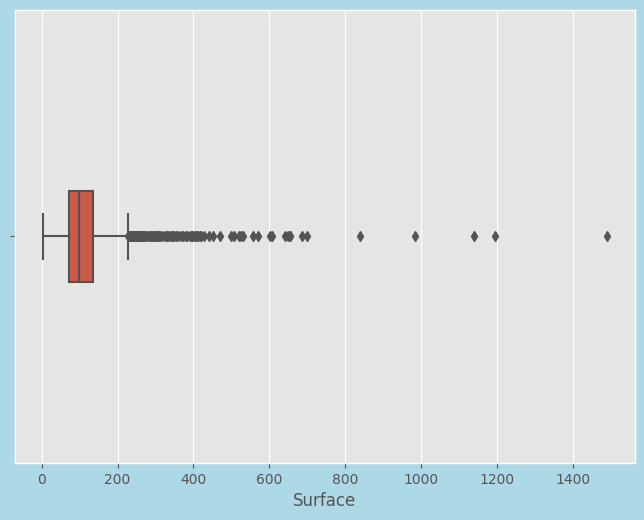

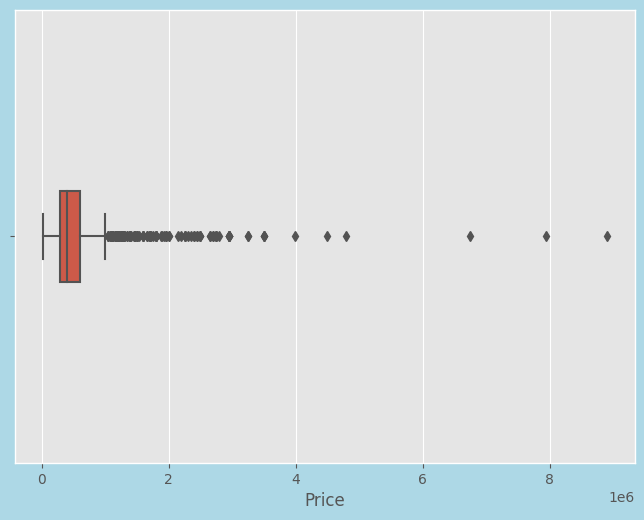

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [243]:
#Show boxplots of numeric values
boxplot_features(numeric_columns)

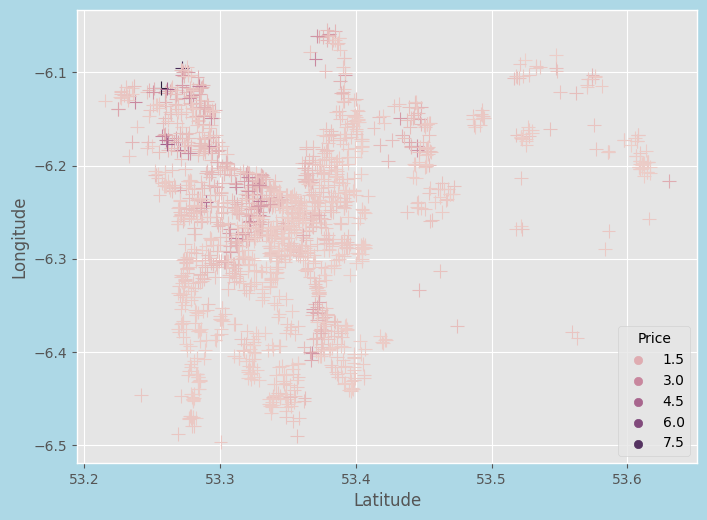

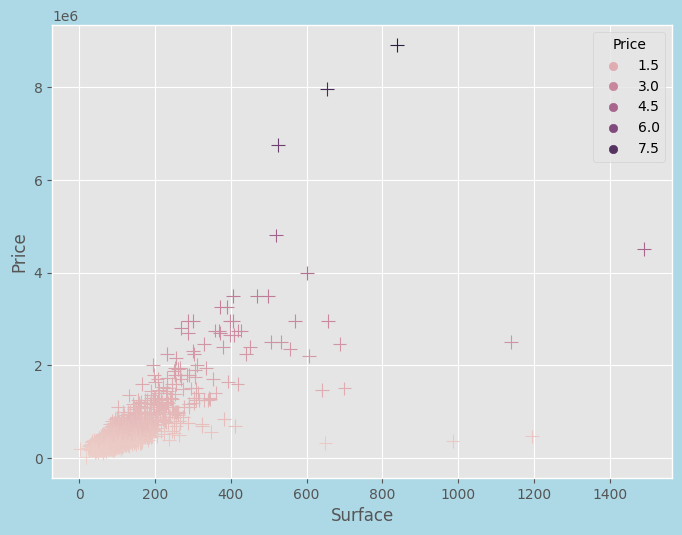

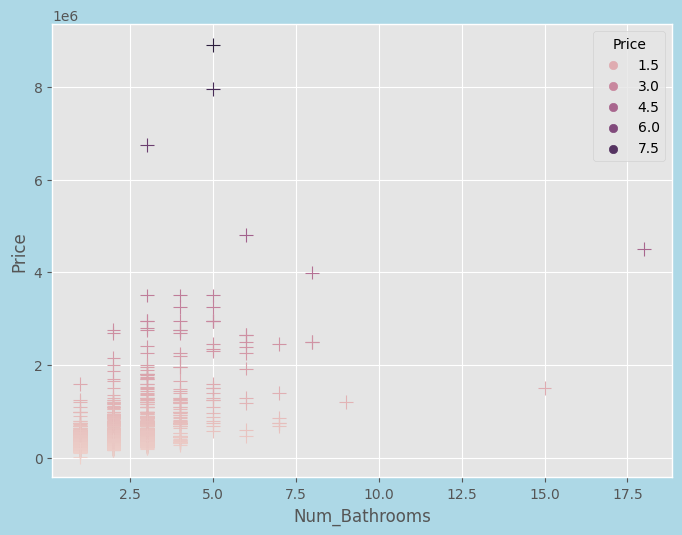

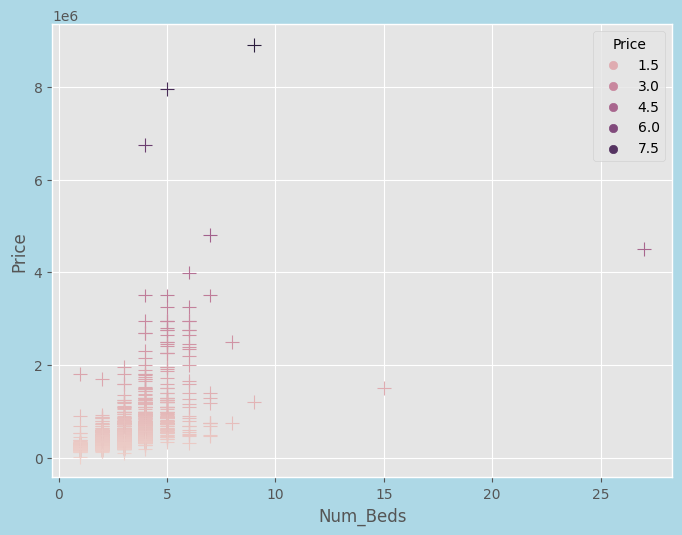

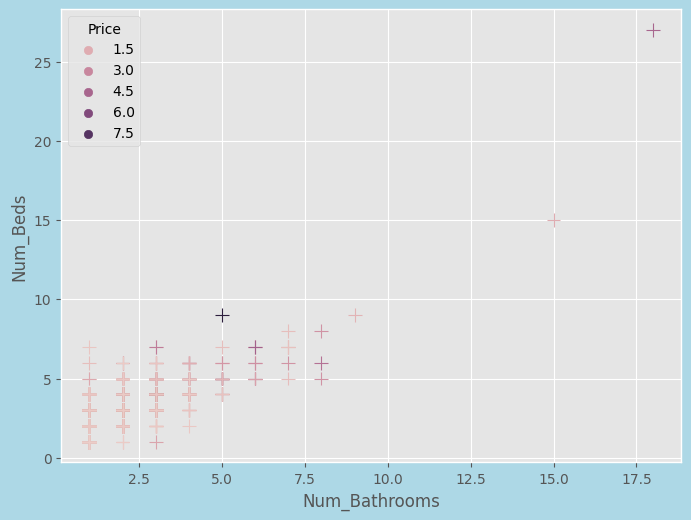

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [244]:
#Show scatterplots of numeric values
scatterplot_features(feature_combo)

In [245]:
def std_method(df,column):
    """Replaces outliers outside of 3 standard deviations from the mean for Gaussian-like distributions
    
    param df: entire bank dataframe
    param df: column in the dataframe that we want to process
    """
    
    data_mean, data_std = mean(df[column]), std(df[column])
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in df[column] if x < lower or x > upper]
    print('Outliers removed: %d' % len(outliers))
    
    #Replace outliers with the median value
    df[column].values[df[column].values < lower] = df[column].median()
    df[column].values[df[column].values > upper] = df[column].median()
    
    return df

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

Your comments, explanation, and references here.

## Pre-Processing

In [246]:
# Removing stopwords and stemming
# a stem must be a word
# Example:  fishing, fished, and fisher: stem -> fish
# choose English as the target language
stemmer = SnowballStemmer('english', ignore_stopwords=False)

In [247]:
# Stop words are basically a set of commonly used words in any language
# https://en.wikipedia.org/wiki/Stop_word
# and are filtered out before processing of natural language data 
# Example list: https://github.com/igorbrigadir/stopwords/blob/master/en/terrier.txt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

swords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [248]:
# example: remove anything that is not a letter
string_sample = '123This @45is 890-130 an_example !!'
new_string = re.sub('[^a-zA-Z]', ' ', string_sample) 
print(new_string)

   This    is         an example   


In [249]:
# Make copies of the data
dftrain_nlp = dftrain
dftest_nlp = dftest

In [250]:
dftrain_nlp.head(5)

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


In [251]:
#Isolate categorical and free text data
dftrain_nlp = dftrain_nlp.select_dtypes("object")
dftest_nlp = dftest_nlp.select_dtypes("object")

In [252]:
#Drop Services
dftrain_nlp.drop(columns="Services",inplace=True)
dftest_nlp.drop(columns="Services",inplace=True)

In [253]:
#Drop NaN rows
dftrain_nlp.dropna(subset=["Features"],inplace=True)
dftest_nlp.dropna(subset=["Features"],inplace=True)

In [254]:
#Clean data using regular expressions - remove everything except letters and numbers
dftrain_nlp['Description'] = dftrain_nlp['Description'].str.replace("[^a-zA-Z0-9#]", " ")
dftrain_nlp['Features'] = dftrain_nlp['Features'].str.replace("[^a-zA-Z0-9#]", " ")

In [255]:
dftrain_nlp.head(5)

,Location,BER_class,Description,Features,Type
1,North Strand,D1,13 Northbrook Terrace is a charming red brick ...,Bight and Spacious interior Numerous original ...,terraced
2,Stepaside,A3,Welcome to No 6 Cotter Close an immaculately...,Special Features Large rear garden Generous of...,semi-detached
3,Cabinteely,E1,Welcome to 3 Sycamore Walk Enjoying a premi...,Wonderful 3 bed detached bungalow Accomm...,detached
4,Lusk,D1,Four Seasons comes to the market as a wonder...,Detached Property Double Glazed Windows ...,detached
6,North Circular Road,C3,6 Marlborough Court is a bright and spacious t...,First floor purpose built apartment Cul de sac...,apartment


In [256]:
dftrain_nlp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 1 to 1637
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Location     1121 non-null   object
 1   BER_class    998 non-null    object
 2   Description  1121 non-null   object
 3   Features     1121 non-null   object
 4   Type         1121 non-null   object
dtypes: object(5)
memory usage: 52.5+ KB


In [257]:
#Clean data using regular expressions - remove words less than 4 charaters
short_word = 4
dftrain_nlp['Description'] = dftrain_nlp['Description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>short_word]))
dftrain_nlp['Features'] = dftrain_nlp['Features'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>short_word]))

In [258]:
#Clean data using regular expressions - make all characters lower case
dftrain_nlp['Description'] = dftrain_nlp['Description'].apply(lambda x: x.lower())
dftrain_nlp['Features'] = dftrain_nlp['Features'].apply(lambda x: x.lower())

In [259]:
# tokenization
tokenized_description = dftrain_nlp['Description'].apply(lambda x: x.split())
tokenized_features = dftrain_nlp['Features'].apply(lambda x: x.split())

In [260]:
print(tokenized_description)

1       [northbrook, terrace, charming, brick, period,...
2       [welcome, cotter, close, immaculately, present...
3       [welcome, sycamore, enjoying, premier, address...
4       [seasons, comes, market, wonderful, opportunit...
6       [marlborough, court, bright, spacious, bedroom...
                              ...                        
1630    [joint, agents, murphy, mullan, bohan, hyland,...
1631    [delighted, represent, carndonagh, drive, spac...
1633    [built, stradbrook, delightful, bedroom, doubl...
1634    [impressive, three, story, family, superbly, l...
1637    [superb, opportunity, awaits, acquire, beautif...
Name: Description, Length: 1121, dtype: object


In [261]:
# remove stop-words
tokenized_description = tokenized_description.apply(lambda x: [item for item in x if item not in swords])
tokenized_features = tokenized_features.apply(lambda x: [item for item in x if item not in swords])

TBC...

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

Your comments, explanation, and references here.

First thing that we will do is remove NaN rows and columns with poor data. Services had 36.7% missing data so we will drop that column

In [262]:
# Make copies of the data
dftrain_pr = dftrain
dftest_pr = dftest

In [263]:
dftrain_pr.shape

(1635, 14)

In [264]:
dftest_pr.shape

(702, 13)

In [265]:
#Drop Index, ID, and Services
dftrain_pr.drop(columns="Services",inplace=True)
dftest_pr.drop(columns="Services",inplace=True)

dftrain_pr.drop(columns="Index",inplace=True)
dftest_pr.drop(columns="Index",inplace=True)

dftrain_pr.drop(columns="ID",inplace=True)
dftest_pr.drop(columns="ID",inplace=True)

In [266]:
#Drop NaN rows
dftrain_pr = dftrain_pr.dropna()
dftest_pr = dftest_pr.dropna()

In [267]:
dftrain_pr.shape

(998, 11)

In [268]:
dftest_pr.shape

(594, 10)

In [269]:
dftrain_pr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 1 to 1637
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       998 non-null    object 
 1   Num_Bathrooms  998 non-null    int64  
 2   Num_Beds       998 non-null    int64  
 3   BER_class      998 non-null    object 
 4   Description    998 non-null    object 
 5   Features       998 non-null    object 
 6   Latitude       998 non-null    float64
 7   Longitude      998 non-null    float64
 8   Type           998 non-null    object 
 9   Surface        998 non-null    float64
 10  Price          998 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 93.6+ KB


Encoding location using mapper

In [270]:
labels = dftrain_pr['Location'].astype('category').cat.categories.tolist()
replace_map_comp_1 = {'Location' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
dftrain_pr.replace(replace_map_comp_1, inplace=True)

In [271]:
labels = dftest_pr['Location'].astype('category').cat.categories.tolist()
replace_map_comp_1 = {'Location' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
dftest_pr.replace(replace_map_comp_1, inplace=True)

In [272]:
pip install category_encoders

In [273]:
import category_encoders as ce

# create object of Ordinalencoding
encoder = ce.OrdinalEncoder(cols=['BER_class'],return_df=True, mapping=[{'col':'BER_class', 
                                                                     'mapping':{'A1':0,
                                                                                'A2':1,
                                                                                'A3':2,
                                                                                'B1':3,
                                                                                'B2':4,
                                                                                'B3':5,
                                                                                'C1':6,
                                                                                'C2':7,
                                                                                'C3':8,
                                                                                'D1':9,
                                                                                'D2':10,
                                                                                'E1':11,
                                                                                'E2':12,
                                                                                'F':13,
                                                                                'G':14,
                                                                                'SINo666of2006exempt':15}}])

In [274]:
#fit and transform train & test data 
dftrain_pr = encoder.fit_transform(dftrain_pr)
dftest_pr = encoder.fit_transform(dftest_pr)

In [275]:
dftrain_pr.shape

(998, 11)

In [276]:
dftest_pr.shape

(594, 10)

We will one hot encode property type

In [277]:
# One Hot Encoding
dftrain_pr = pd.get_dummies(dftrain, columns = ["Type"])
dftest_pr = pd.get_dummies(dftest, columns = ["Type"])

In [278]:
dftrain_pr.shape

(1635, 20)

In [279]:
dftest_pr.shape

(702, 18)

In [282]:
dftrain_pr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1635 entries, 0 to 1637
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Location             1635 non-null   object 
 1   Num_Bathrooms        1635 non-null   int64  
 2   Num_Beds             1635 non-null   int64  
 3   BER_class            1385 non-null   object 
 4   Description          1635 non-null   object 
 5   Features             1121 non-null   object 
 6   Latitude             1635 non-null   float64
 7   Longitude            1635 non-null   float64
 8   Surface              1635 non-null   float64
 9   Price                1635 non-null   int64  
 10  Type_apartment       1635 non-null   uint8  
 11  Type_bungalow        1635 non-null   uint8  
 12  Type_detached        1635 non-null   uint8  
 13  Type_duplex          1635 non-null   uint8  
 14  Type_end-of-terrace  1635 non-null   uint8  
 15  Type_semi-detached   1635 non-null   u

## Baseline Model

Similar to Etivity2 we will implement a baseline model to get started

In [280]:
# dropna: remove missing values
df_subset_train = dftrain_pr.dropna(axis=0)
df_subset_test = dftest_pr.dropna(axis=0)

In [281]:
print('Number of nan in df_subset_train dataset: ',df_subset_train.isnull().sum().sum())
print('Number of nan in df_subset_test dataset: ',df_subset_test.isnull().sum().sum())

Number of nan in df_subset_train dataset:  0
Number of nan in df_subset_test dataset:  0


In [ ]:
# train set, input columns
Xs_train = df_subset_train.iloc[:,0:-1].values 
# train set, output column, price (cost)
ys_train = df_subset_train.iloc[:,-1].values.reshape(-1,1)
# test set, input columns
Xs_test = df_subset_test.iloc[:,0:].values 
# test set, output column, price (cost)
y_test = df_cost.cost.values

In [ ]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = Xs_test.copy()
xscaler = sc.fit(Xss_test)
Xn_test = xscaler.transform(Xss_test)

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

In [ ]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])

In [ ]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [ ]:
# samples from the posterior
posterior = approximation.sample(5000)

In [ ]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - y_test))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - y_test) / y_test)))

## Select longitude and latitude to create clusters

### Clustering

#### Full Model

In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)

# Features longitude and latitude.
ind=[6,7]

X_ind = np.vstack([Xn_train[:,ind],Xn_test[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)
# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1])
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])

### Clusters

In [ ]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))

In [ ]:
# test clusters
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

In [ ]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_test[clusters_test==0,:]
ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [ ]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_test[clusters_test==1,:]
ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [ ]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_test[clusters_test==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)

In [ ]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_test[clusters_test==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

## Piecewise Regression

In [ ]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])
    
with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

posterior0 = approximation.sample(5000)

In [ ]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

In [ ]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000)

In [ ]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

In [ ]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

### Simulations

Cluster 0

In [ ]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

Cluster 1

In [ ]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

Cluster 2

In [ ]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

Cluster 3

In [ ]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Overall

In [ ]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Test set performance

In [ ]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("Size Cluster0", np.sum(clusters_test==0), ", MAE Cluster0=",
      (np.mean(abs(y_pred_BLR0 - y_test[clusters_test==0]))))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("Size Cluster1", np.sum(clusters_test==1), ", MAE Cluster1=",
      (np.mean(abs(y_pred_BLR1 - y_test[clusters_test==1]))))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("Size Cluster2", np.sum(clusters_test==2), ", MAE Cluster2=",
      (np.mean(abs(y_pred_BLR2 - y_test[clusters_test==2]))))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("Size Cluster3", np.sum(clusters_test==3), ", MAE Cluster3=",
      (np.mean(abs(y_pred_BLR3 - y_test[clusters_test==3]))))

# joint
joint=np.hstack([abs(y_pred_BLR0 - y_test[clusters_test==0]),
                 abs(y_pred_BLR1 - y_test[clusters_test==1]),
                 abs(y_pred_BLR2 - y_test[clusters_test==2]),
                 abs(y_pred_BLR3 - y_test[clusters_test==3])])

# MAE
print("MAE=",np.mean(joint))

### PPC on test set

In [ ]:
## Posterior predictive checks (PPCs)

num_samples2 = 200
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xtestn0, nsamples=num_samples2)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xtestn1, nsamples=num_samples2)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xtestn2, nsamples=num_samples2)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xtestn3, nsamples=num_samples2)

# Stack arrays in sequence horizontally (column wise)
Ypred = np.hstack([yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# plot prediction shape
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

# true observations
az.plot_dist(np.log(y_test),label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [ ]:
# your code here

# SUMMARY

Your summary here.